In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Train.csv") 

In [3]:
print(df.head())
print(df.shape)
columns = list(df.columns)
print(columns)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [7]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
unique_values = df["Outlet_Size"].unique()
print("Unique values:", unique_values)
print("Number of unique values:", len(unique_values))

Unique values: ['Medium' 'High' 'Small']
Number of unique values: 3


In [12]:
unique_values = df["Item_Fat_Content"].unique()
print("Unique values:", unique_values)
print("Number of unique values:", len(unique_values))

Unique values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Number of unique values: 5


In [13]:
# Merge similar categories
df["Item_Fat_Content"].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

# Check unique values after merging
unique_values = df["Item_Fat_Content"].unique()
print("Unique values after merging:", unique_values)

Unique values after merging: ['Low Fat' 'Regular']


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Fat_Content']= le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']= le.fit_transform(df['Item_Type'])
df['Outlet_Size']= le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']= le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']= le.fit_transform(df['Outlet_Type'])

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [17]:
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

In [18]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [19]:
print(df.duplicated().any()) 
print(df.duplicated())

False
0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 

Figure(1000x400)


<Axes: xlabel='Item_Weight'>

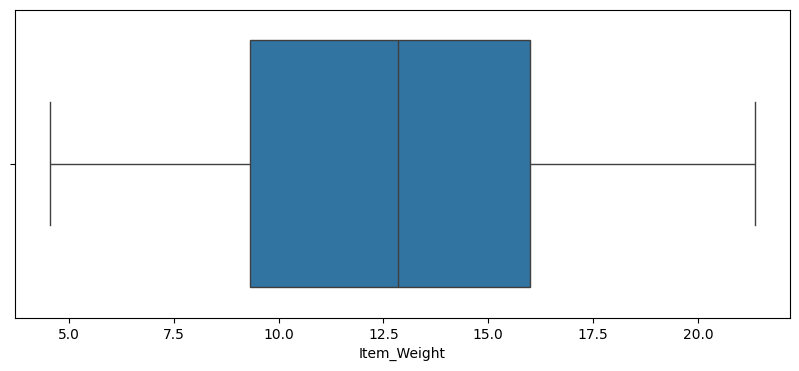

In [21]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Weight", data = df)

Figure(1000x400)


<Axes: xlabel='Item_Fat_Content'>

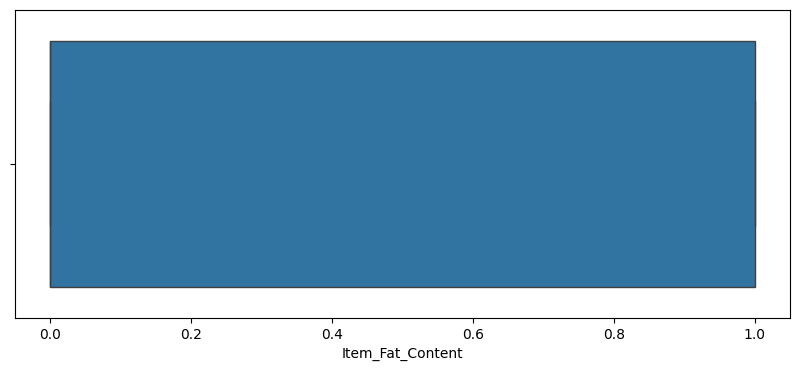

In [22]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Fat_Content", data = df)

Figure(1000x400)


<Axes: xlabel='Item_Visibility'>

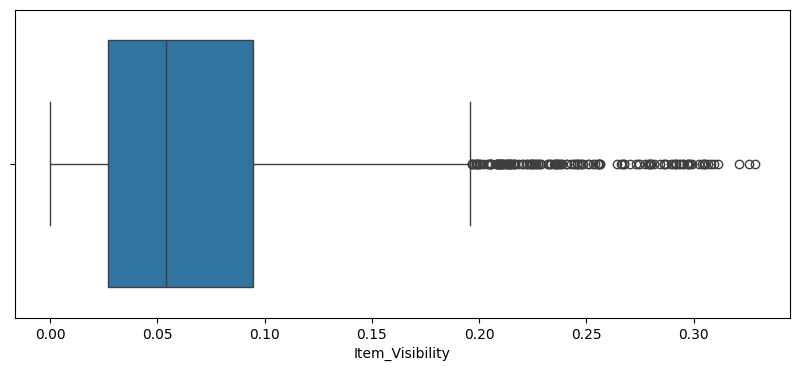

In [23]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Visibility", data = df)

Figure(1000x400)


<Axes: xlabel='Item_MRP'>

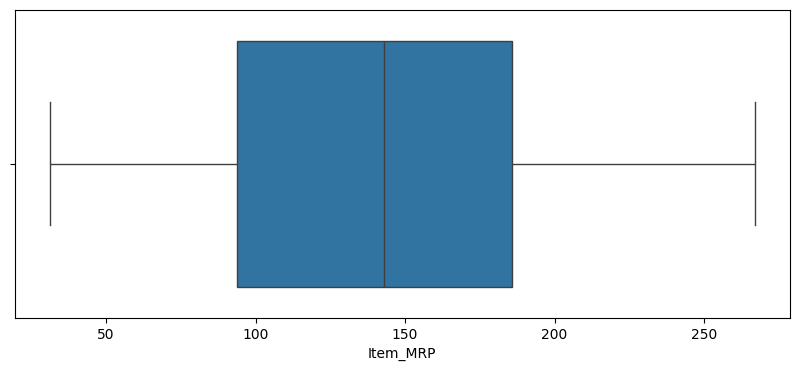

In [24]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_MRP", data = df)

Figure(1000x400)


<Axes: xlabel='Item_Outlet_Sales'>

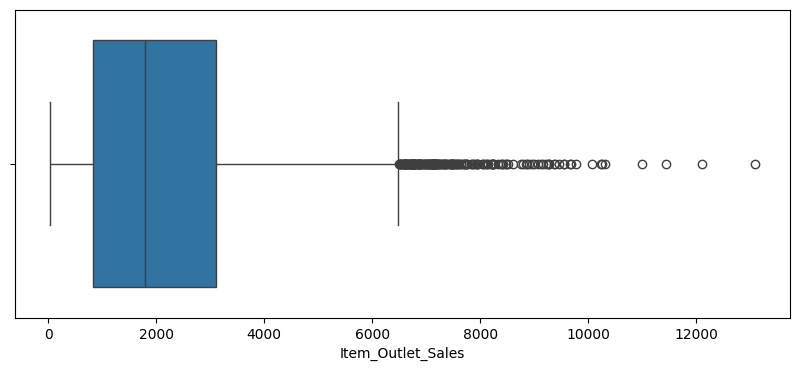

In [25]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Outlet_Sales", data = df)

In [52]:
percentile25 = df['Item_Visibility'].quantile(0.25)
percentile75 = df['Item_Visibility'].quantile(0.75)
iqr = percentile75 - percentile25

In [53]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [49]:
df[df['Item_Visibility'] > upper_limit]
df[df['Item_Visibility'] < lower_limit]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [54]:
df = df[df['Item_Visibility'] < upper_limit]
df.shape

(8136, 10)

<Axes: ylabel='Item_Visibility'>

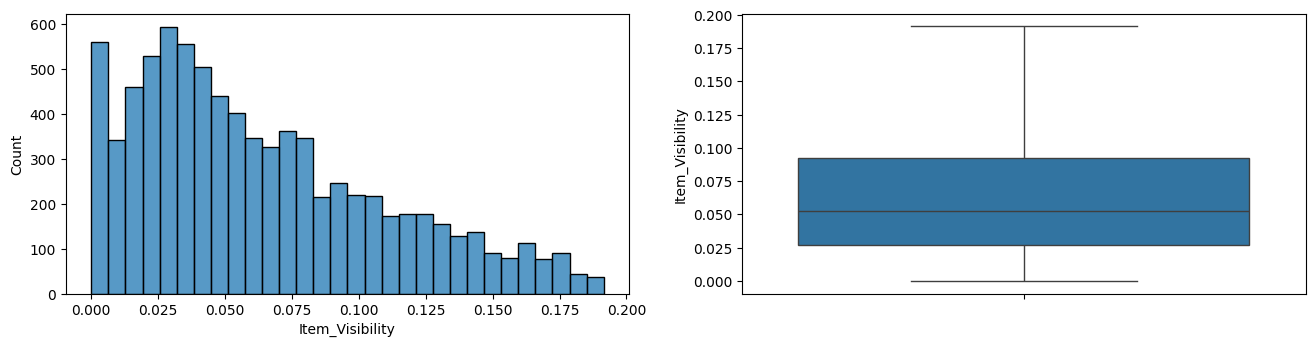

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Item_Visibility'])
plt.subplot(2,2,2)
sns.boxplot(df['Item_Visibility'])


<Axes: ylabel='Item_Outlet_Sales'>

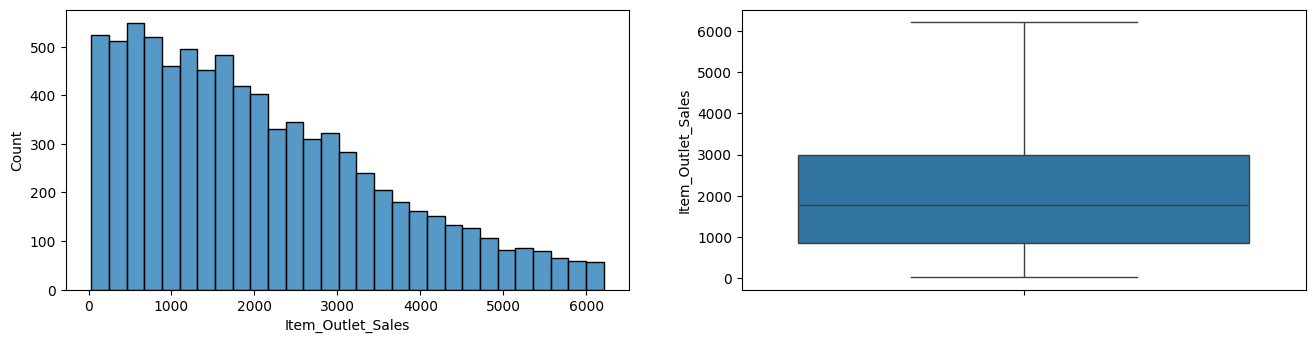

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Item_Outlet_Sales'])
plt.subplot(2,2,2)
sns.boxplot(df['Item_Outlet_Sales'])

In [61]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score




# Define features and target variable
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the regressor
rf_regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("R 2 score : ",r2_score(y_test, y_pred))

Mean Squared Error: 1041547.7896816923
R 2 score :  0.5197619051226973


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
# data = pd.read_csv("your_dataset.csv")  # Replace "your_dataset.csv" with the actual file name

# Drop any rows with missing values
# data.dropna(inplace=True)

# Define features and target variable
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
linear_reg = LinearRegression()

# Training the model
linear_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = linear_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("R 2 score : ",r2_score(y_test, y_pred))


Mean Squared Error: 1167867.8562943072
R 2 score :  0.46151809841906477


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset


# Define features and target variable
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the SVR model
svr = SVR(kernel='rbf')

# Training the model
svr.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = svr.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("R 2 score : ",r2_score(y_test, y_pred))


Mean Squared Error: 2008219.3678449607
R 2 score :  0.07404782299590607
